In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leesa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load data
Two CSV files + one API

In [2]:
# read CSV file 2 which has villager popularity ratings
popularity = pd.read_csv('data/acnh_villager_data.csv')

# display first 5 rows of popularity data to examine
popularity.head()

,tier,rank,name
0,1,1,Raymond
1,1,2,Marshal
2,1,3,Shino
3,1,4,Sherb
4,1,5,Sasha


In [3]:
# read CSV file 1 with paradise planning data for each villager
paradise = pd.read_csv('data/Paradise Planning.csv')

# display first 5 rows to examine data
paradise.head()

,Name,Filename,Request,Thought bubble,Song,Furniture List,Furniture Name List,Unique Entry ID
0,Ace,brd09,The Fishin' Hole,I want a place where I can fish to my heart's ...,To the Edge,3064;13637;13347,cooler box;outdoor folding chair;yacht,yrzvoz4kNmqN8N2pX
1,Admiral,brd06,Cool Country Cabin,I want a cool cabin where I can relax on hot d...,K.K. Rally,2736;2326;5979,retro fan;water pump;bamboo noodle slide,2dKeMSMjBLekssvwo
2,Agent S,squ05,Training Grounds for a Hero,"Heroes train! It's what they do, even on vacat...",Go K.K. Rider,7653;4015;4078,speed bag;shower booth;barbell,EN7dGxBHogyTYD4pS
3,Agnes,pig17,The Artsiest Art Museum,I want a place that's like a museum with artsy...,K.K. Fugue,1712;13255;13302,poster stand;elaborate display case;decorative...,pmmgTrYA9hvoj2v9b
4,Al,gor08,Gymnastics School for Kids,My dream is to someday teach gymnastics to kids.,K.K. Étude,12701;13188;7845,school locker;ball catcher;pull-up-bar stand,XKm6cmQjf4eFAHMRT


In [4]:
# retrieve villagers data from the API
response = requests.get('https://acnhapi.com/v1/villagers')

In [5]:
# convert villagers data into JSON format
data = response.json()

In [6]:
# print the keys to understand structure
print(data.keys())

dict_keys(['ant00', 'ant01', 'ant02', 'ant03', 'ant06', 'ant08', 'ant09', 'bea00', 'bea01', 'bea02', 'bea03', 'bea05', 'bea06', 'bea07', 'bea08', 'bea09', 'bea10', 'bea11', 'bea12', 'bea13', 'bea14', 'bea15', 'brd00', 'brd01', 'brd02', 'brd03', 'brd04', 'brd05', 'brd06', 'brd08', 'brd11', 'brd15', 'brd16', 'brd17', 'brd18', 'bul00', 'bul01', 'bul03', 'bul05', 'bul07', 'bul08', 'cat00', 'cat01', 'cat02', 'cat03', 'cat04', 'cat05', 'cat06', 'cat07', 'cat08', 'cat09', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat23', 'cbr00', 'cbr01', 'cbr02', 'cbr03', 'cbr04', 'cbr05', 'cbr06', 'cbr07', 'cbr09', 'cbr10', 'cbr13', 'cbr14', 'cbr15', 'cbr16', 'cbr17', 'cbr19', 'chn00', 'chn01', 'chn02', 'chn05', 'chn09', 'chn10', 'chn11', 'chn12', 'chn13', 'cow00', 'cow01', 'cow06', 'cow07', 'crd00', 'crd01', 'crd02', 'crd04', 'crd06', 'crd07', 'crd08', 'der00', 'der01', 'der02', 'der03', 'der04', 'der05', 'der06', 'der07', 'der08', 'der09',

In [7]:
# initialize empty list to store villager data
data_list = []

In [8]:
# loop through each key
for key in data.keys():
    # get the data for each villager using key
    villager_data = data[key]
    
    # convert the data for the villager into a dataframe
    villager_df = pd.json_normalize(villager_data)
    
    # append the dataframe to data_list
    data_list.append(villager_df)
    
#concatenate all dataframes in the list into a single villagers dataframe
villagers = pd.concat(data_list, ignore_index=True)

In [9]:
# display first 5 rows of villagers data to examine
villagers.head()

,id,file-name,personality,birthday-string,birthday,species,gender,subtype,hobby,catch-phrase,...,catch-translations.catch-USes,catch-translations.catch-EUfr,catch-translations.catch-USfr,catch-translations.catch-EUit,catch-translations.catch-EUnl,catch-translations.catch-CNzh,catch-translations.catch-TWzh,catch-translations.catch-JPja,catch-translations.catch-KRko,catch-translations.catch-EUru
0,1,ant00,Cranky,March 9th,9/3,Anteater,Male,B,Education,ah-CHOO,...,achús,ATCHOUM,ATCHOUM,ett-CCIÙ,ha-TSJOE,有的,有的,でごわす,임돠,апчхи
1,2,ant01,Jock,October 20th,20/10,Anteater,Male,B,Fitness,honk,...,fufuf,pouet,pouet,honk,snuit,真诚,真誠,ホントに,진짜로,го-го-го
2,3,ant02,Peppy,November 9th,9/11,Anteater,Female,B,Fashion,snooooof,...,snuf-snuf,pouuuuuf,pouuuuuf,snuuf,snufffff,希希,希希,だっしー,라지요,снуф-снуф
3,4,ant03,Peppy,February 16th,16/2,Anteater,Female,B,Fashion,snorty,...,fa-fiú,grognon,grognon,snorty,snork,真的假的,真的假的,マジでー,정말,хрум-хрум
4,5,ant06,Snooty,October 24th,24/10,Anteater,Female,A,Education,sniffff,...,sniff,snif snif,snif snif,sniffff,snuifff,麻烦了,麻煩了,たもれ,추릅,шмыг


# Clean data, merge, and calculate new values

## Clean

In [10]:
# print column names from villagers data to see which columns are not needed
print(villagers.columns)

Index(['id', 'file-name', 'personality', 'birthday-string', 'birthday',
       'species', 'gender', 'subtype', 'hobby', 'catch-phrase', 'icon_uri',
       'image_uri', 'bubble-color', 'text-color', 'saying', 'name.name-USen',
       'name.name-EUen', 'name.name-EUde', 'name.name-EUes', 'name.name-USes',
       'name.name-EUfr', 'name.name-USfr', 'name.name-EUit', 'name.name-EUnl',
       'name.name-CNzh', 'name.name-TWzh', 'name.name-JPja', 'name.name-KRko',
       'name.name-EUru', 'catch-translations.catch-USen',
       'catch-translations.catch-EUen', 'catch-translations.catch-EUde',
       'catch-translations.catch-EUes', 'catch-translations.catch-USes',
       'catch-translations.catch-EUfr', 'catch-translations.catch-USfr',
       'catch-translations.catch-EUit', 'catch-translations.catch-EUnl',
       'catch-translations.catch-CNzh', 'catch-translations.catch-TWzh',
       'catch-translations.catch-JPja', 'catch-translations.catch-KRko',
       'catch-translations.catch-EUru'],


In [11]:
# DROP UNNEEDED COLUMNS IN VILLAGERS DATAFRAME
# define list of column names to drop from the villagers dataframe
columns_to_drop = ['file-name','icon_uri', 'image_uri', 'name.name-EUen', 'name.name-EUde', 'name.name-EUes', 'name.name-USes',
       'name.name-EUfr', 'name.name-USfr', 'name.name-EUit', 'name.name-EUnl',
       'name.name-CNzh', 'name.name-TWzh', 'name.name-JPja', 'name.name-KRko',
       'name.name-EUru', 'catch-translations.catch-USen',
       'catch-translations.catch-EUen', 'catch-translations.catch-EUde',
       'catch-translations.catch-EUes', 'catch-translations.catch-USes',
       'catch-translations.catch-EUfr', 'catch-translations.catch-USfr',
       'catch-translations.catch-EUit', 'catch-translations.catch-EUnl',
       'catch-translations.catch-CNzh', 'catch-translations.catch-TWzh',
       'catch-translations.catch-JPja', 'catch-translations.catch-KRko',
       'catch-translations.catch-EUru']
# drop the columns from the villagers dataframe
villagers = villagers.drop(columns=columns_to_drop)
# verify the columns were dropped
villagers.head()

,id,personality,birthday-string,birthday,species,gender,subtype,hobby,catch-phrase,bubble-color,text-color,saying,name.name-USen
0,1,Cranky,March 9th,9/3,Anteater,Male,B,Education,ah-CHOO,#194c89,#fffad4,Don't punch your nose to spite your face.,Cyrano
1,2,Jock,October 20th,20/10,Anteater,Male,B,Fitness,honk,#fff98f,#879b96,Always go for the burn!,Antonio
2,3,Peppy,November 9th,9/11,Anteater,Female,B,Fashion,snooooof,#00d1bd,#fffce9,A thing of beauty is a joy forever.,Pango
3,4,Peppy,February 16th,16/2,Anteater,Female,B,Fashion,snorty,#ff791f,#fff2bb,Dance like no one's watching!,Anabelle
4,5,Snooty,October 24th,24/10,Anteater,Female,A,Education,sniffff,#f2bdc7,#634b4b,"Request forgiveness, not permission.",Snooty


In [12]:
# move column with names of villagers to the second column
villagers.insert(1, 'name.name-USen', villagers.pop('name.name-USen'))

#verify the column was moved
villagers.head()

,id,name.name-USen,personality,birthday-string,birthday,species,gender,subtype,hobby,catch-phrase,bubble-color,text-color,saying
0,1,Cyrano,Cranky,March 9th,9/3,Anteater,Male,B,Education,ah-CHOO,#194c89,#fffad4,Don't punch your nose to spite your face.
1,2,Antonio,Jock,October 20th,20/10,Anteater,Male,B,Fitness,honk,#fff98f,#879b96,Always go for the burn!
2,3,Pango,Peppy,November 9th,9/11,Anteater,Female,B,Fashion,snooooof,#00d1bd,#fffce9,A thing of beauty is a joy forever.
3,4,Anabelle,Peppy,February 16th,16/2,Anteater,Female,B,Fashion,snorty,#ff791f,#fff2bb,Dance like no one's watching!
4,5,Snooty,Snooty,October 24th,24/10,Anteater,Female,A,Education,sniffff,#f2bdc7,#634b4b,"Request forgiveness, not permission."


In [13]:
# change all column names in villagers data to title case
villagers.columns = villagers.columns.str.title()
# verify
villagers.head()

,Id,Name.Name-Usen,Personality,Birthday-String,Birthday,Species,Gender,Subtype,Hobby,Catch-Phrase,Bubble-Color,Text-Color,Saying
0,1,Cyrano,Cranky,March 9th,9/3,Anteater,Male,B,Education,ah-CHOO,#194c89,#fffad4,Don't punch your nose to spite your face.
1,2,Antonio,Jock,October 20th,20/10,Anteater,Male,B,Fitness,honk,#fff98f,#879b96,Always go for the burn!
2,3,Pango,Peppy,November 9th,9/11,Anteater,Female,B,Fashion,snooooof,#00d1bd,#fffce9,A thing of beauty is a joy forever.
3,4,Anabelle,Peppy,February 16th,16/2,Anteater,Female,B,Fashion,snorty,#ff791f,#fff2bb,Dance like no one's watching!
4,5,Snooty,Snooty,October 24th,24/10,Anteater,Female,A,Education,sniffff,#f2bdc7,#634b4b,"Request forgiveness, not permission."


In [14]:
# rename 'Name.name-USen' column to 'Name' in villagers data
villagers = villagers.rename(columns={'Name.Name-Usen': 'Name'})
#verify
villagers.head()

,Id,Name,Personality,Birthday-String,Birthday,Species,Gender,Subtype,Hobby,Catch-Phrase,Bubble-Color,Text-Color,Saying
0,1,Cyrano,Cranky,March 9th,9/3,Anteater,Male,B,Education,ah-CHOO,#194c89,#fffad4,Don't punch your nose to spite your face.
1,2,Antonio,Jock,October 20th,20/10,Anteater,Male,B,Fitness,honk,#fff98f,#879b96,Always go for the burn!
2,3,Pango,Peppy,November 9th,9/11,Anteater,Female,B,Fashion,snooooof,#00d1bd,#fffce9,A thing of beauty is a joy forever.
3,4,Anabelle,Peppy,February 16th,16/2,Anteater,Female,B,Fashion,snorty,#ff791f,#fff2bb,Dance like no one's watching!
4,5,Snooty,Snooty,October 24th,24/10,Anteater,Female,A,Education,sniffff,#f2bdc7,#634b4b,"Request forgiveness, not permission."


In [15]:
villagers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               391 non-null    int64 
 1   Name             391 non-null    object
 2   Personality      391 non-null    object
 3   Birthday-String  391 non-null    object
 4   Birthday         391 non-null    object
 5   Species          391 non-null    object
 6   Gender           391 non-null    object
 7   Subtype          391 non-null    object
 8   Hobby            391 non-null    object
 9   Catch-Phrase     391 non-null    object
 10  Bubble-Color     391 non-null    object
 11  Text-Color       391 non-null    object
 12  Saying           391 non-null    object
dtypes: int64(1), object(12)
memory usage: 39.8+ KB


In [16]:
paradise.head()

,Name,Filename,Request,Thought bubble,Song,Furniture List,Furniture Name List,Unique Entry ID
0,Ace,brd09,The Fishin' Hole,I want a place where I can fish to my heart's ...,To the Edge,3064;13637;13347,cooler box;outdoor folding chair;yacht,yrzvoz4kNmqN8N2pX
1,Admiral,brd06,Cool Country Cabin,I want a cool cabin where I can relax on hot d...,K.K. Rally,2736;2326;5979,retro fan;water pump;bamboo noodle slide,2dKeMSMjBLekssvwo
2,Agent S,squ05,Training Grounds for a Hero,"Heroes train! It's what they do, even on vacat...",Go K.K. Rider,7653;4015;4078,speed bag;shower booth;barbell,EN7dGxBHogyTYD4pS
3,Agnes,pig17,The Artsiest Art Museum,I want a place that's like a museum with artsy...,K.K. Fugue,1712;13255;13302,poster stand;elaborate display case;decorative...,pmmgTrYA9hvoj2v9b
4,Al,gor08,Gymnastics School for Kids,My dream is to someday teach gymnastics to kids.,K.K. Étude,12701;13188;7845,school locker;ball catcher;pull-up-bar stand,XKm6cmQjf4eFAHMRT


In [17]:
# DROP UNNEEDED COLUMNS IN PARADISE DATAFRAME
# drop the columns from the villagers dataframe
paradise = paradise.drop(columns=['Filename', 'Thought bubble','Furniture List', 'Furniture Name List', 'Unique Entry ID'])
# verify the columns were dropped
paradise.head()

,Name,Request,Song
0,Ace,The Fishin' Hole,To the Edge
1,Admiral,Cool Country Cabin,K.K. Rally
2,Agent S,Training Grounds for a Hero,Go K.K. Rider
3,Agnes,The Artsiest Art Museum,K.K. Fugue
4,Al,Gymnastics School for Kids,K.K. Étude


In [18]:
paradise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     413 non-null    object
 1   Request  413 non-null    object
 2   Song     413 non-null    object
dtypes: object(3)
memory usage: 9.8+ KB


In [19]:
# change all column names in popularity data to title case
popularity.columns = popularity.columns.str.title()
# verify
popularity.head()

,Tier,Rank,Name
0,1,1,Raymond
1,1,2,Marshal
2,1,3,Shino
3,1,4,Sherb
4,1,5,Sasha


In [20]:
popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier    413 non-null    int64 
 1   Rank    413 non-null    int64 
 2   Name    413 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.8+ KB


In [21]:
# count the number of names in the villagers dataframe that are also present in the popularity dataframe
villagers['Name'].isin(popularity['Name']).sum()

386

In [22]:
# find names in villagers dataframe that are not in popularity dataframe
mismatched_names_villagers = villagers[~villagers['Name'].isin(popularity['Name'])]['Name']
mismatched_names_villagers

159    Wart Jr.
204        Buck
306       Spork
331      O'Hare
341       Renée
Name: Name, dtype: object

In [23]:
# find names in popularity dataframe that are not in villagers dataframe
mismatched_names_popularity = popularity[~popularity['Name'].isin(villagers['Name'])]['Name']
mismatched_names_popularity

2               Shino
4               Sasha
5                Ione
25         Cephalobot
57             Étoile
84          Tiansheng
105             Petri
108             Quinn
114             Marlo
116              Chai
146            Azalea
158             Faith
170          Chabwick
202            WartJr
212               Rio
216       Buck(Brows)
222             Renee
224           Chelsea
226             Marty
229           Roswell
261               Zoe
287             OHare
300    Crackle(Spork)
323               Ace
328              Toby
341             Frett
399             Rilla
Name: Name, dtype: object

In [24]:
# change names in popularity dataframe to match names in villagers dataframe
popularity['Name'] = popularity['Name'].replace(['WartJr'],"Wart Jr.")
popularity['Name'] = popularity['Name'].replace(['Buck(Brows)'],"Buck")
popularity['Name'] = popularity['Name'].replace(['Crackle(Spork)'],"Spork")
popularity['Name'] = popularity['Name'].replace(['OHare'],"O\'Hare")
popularity['Name'] = popularity['Name'].replace(['Renee'],"Renée")

In [25]:
# keep only rows in popularity where the Name is also present in villagers
popularity = popularity[popularity['Name'].isin(villagers['Name'])]
#check number of remaining rows to see if it matches villagers(391)
popularity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 412
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier    391 non-null    int64 
 1   Rank    391 non-null    int64 
 2   Name    391 non-null    object
dtypes: int64(2), object(1)
memory usage: 12.2+ KB


In [26]:
# count the number of names in the villagers dataframe that are also present in the paradise dataframe
villagers['Name'].isin(paradise['Name']).sum()

391

In [27]:
# Check which names in the paradise dataframe are not in the villagers dataframe
not_in_villagers = ~paradise['Name'].isin(villagers['Name'])

# Count the number of such rows
num_not_in_villagers = not_in_villagers.sum()

num_not_in_villagers

22

In [28]:
# keep only rows in popularity where the Name is also present in villagers
paradise = paradise[paradise['Name'].isin(villagers['Name'])]
#check number of remaining rows to see if it matches villagers(391)
paradise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 1 to 412
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     391 non-null    object
 1   Request  391 non-null    object
 2   Song     391 non-null    object
dtypes: object(3)
memory usage: 12.2+ KB


## Merge

In [29]:
merged_df = villagers.merge(popularity, on='Name', how='inner')
merged_df.head()

,Id,Name,Personality,Birthday-String,Birthday,Species,Gender,Subtype,Hobby,Catch-Phrase,Bubble-Color,Text-Color,Saying,Tier,Rank
0,1,Cyrano,Cranky,March 9th,9/3,Anteater,Male,B,Education,ah-CHOO,#194c89,#fffad4,Don't punch your nose to spite your face.,6,125
1,2,Antonio,Jock,October 20th,20/10,Anteater,Male,B,Fitness,honk,#fff98f,#879b96,Always go for the burn!,5,1
2,3,Pango,Peppy,November 9th,9/11,Anteater,Female,B,Fashion,snooooof,#00d1bd,#fffce9,A thing of beauty is a joy forever.,6,25
3,4,Anabelle,Peppy,February 16th,16/2,Anteater,Female,B,Fashion,snorty,#ff791f,#fff2bb,Dance like no one's watching!,6,4
4,5,Snooty,Snooty,October 24th,24/10,Anteater,Female,A,Education,sniffff,#f2bdc7,#634b4b,"Request forgiveness, not permission.",6,103


In [30]:
final_merged_df = merged_df.merge(paradise, on='Name', how='inner')
final_merged_df.head()

,Id,Name,Personality,Birthday-String,Birthday,Species,Gender,Subtype,Hobby,Catch-Phrase,Bubble-Color,Text-Color,Saying,Tier,Rank,Request,Song
0,1,Cyrano,Cranky,March 9th,9/3,Anteater,Male,B,Education,ah-CHOO,#194c89,#fffad4,Don't punch your nose to spite your face.,6,125,Construction Job Site,Agent K.K.
1,2,Antonio,Jock,October 20th,20/10,Anteater,Male,B,Fitness,honk,#fff98f,#879b96,Always go for the burn!,5,1,A Simple Stronghold,Space K.K.
2,3,Pango,Peppy,November 9th,9/11,Anteater,Female,B,Fashion,snooooof,#00d1bd,#fffce9,A thing of beauty is a joy forever.,6,25,Ultimate Beauty Salon,K.K. Oasis
3,4,Anabelle,Peppy,February 16th,16/2,Anteater,Female,B,Fashion,snorty,#ff791f,#fff2bb,Dance like no one's watching!,6,4,Anabelle's Gathering Garden,K.K. Calypso
4,5,Snooty,Snooty,October 24th,24/10,Anteater,Female,A,Education,sniffff,#f2bdc7,#634b4b,"Request forgiveness, not permission.",6,103,Snooty's Indoor Swim Club,Aloha K.K.


In [31]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 390
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               391 non-null    int64 
 1   Name             391 non-null    object
 2   Personality      391 non-null    object
 3   Birthday-String  391 non-null    object
 4   Birthday         391 non-null    object
 5   Species          391 non-null    object
 6   Gender           391 non-null    object
 7   Subtype          391 non-null    object
 8   Hobby            391 non-null    object
 9   Catch-Phrase     391 non-null    object
 10  Bubble-Color     391 non-null    object
 11  Text-Color       391 non-null    object
 12  Saying           391 non-null    object
 13  Tier             391 non-null    int64 
 14  Rank             391 non-null    int64 
 15  Request          391 non-null    object
 16  Song             391 non-null    object
dtypes: int64(3), object(14)
memory usag

In [32]:
unique_names = final_merged_df['Name'].nunique()
unique_names

391

## Calculate new values

In [33]:
# sort merged dataframe by the 'tier' and 'rank' columns
final_merged_df.sort_values(['Tier', 'Rank'], inplace=True)
final_merged_df

,Id,Name,Personality,Birthday-String,Birthday,Species,Gender,Subtype,Hobby,Catch-Phrase,Bubble-Color,Text-Color,Saying,Tier,Rank,Request,Song
63,64,Raymond,Smug,October 1st,1/10,Cat,Male,B,Nature,crisp,#acc8cf,#498992,Stay on brand!,1,1,A Home Tailored for Me,K.K. Break
371,372,Marshal,Smug,September 29th,29/9,Squirrel,Male,A,Music,sulky,#ffffff,#848484,Seize the day.,1,2,Retro Café Cabin,K.K. Swing
179,180,Sherb,Lazy,January 18th,18/1,Goat,Male,A,Nature,bawwww,#bff2ff,#85a2af,Forty winks is never enough.,1,4,My Fantasy Theme Park,My Place
60,61,Ankha,Snooty,September 22nd,22/9,Cat,Female,B,Nature,me meow,#fff80d,#9b8986,All that glitters is not gold.,1,7,Ancient Oasis,K.K. Bazaar
268,269,Zucker,Lazy,March 8th,8/3,Octopus,Male,A,Nature,bloop,#e4b887,#fffce9,There's no such thing as luck.,1,8,Festival Grounds,Spring Blossoms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,198,Rocco,Cranky,August 18th,18/8,Hippo,Male,B,Education,hippie,#87e0a9,#219479,The only thing to fear is fear itself... and w...,6,159,Rocco's Danger Zone,Surfin' K.K.
262,263,Bettina,Normal,June 12th,12/6,Mouse,Female,B,Education,eekers,#ff791f,#fff2bb,No time like the present!,6,160,A Peerless Patisserie,Café K.K.
308,309,Boris,Cranky,November 6th,6/11,Pig,Male,A,Nature,schnort,#194c89,#fffad4,Life's short. Eat chocolate.,6,161,A Music Producer's Home,K.K. Technopop
201,202,Bitty,Snooty,October 6th,6/10,Hippo,Female,A,Education,my dear,#f993ce,#fffce9,Necessity is the mother of all invention.,6,162,My Fashion-Mag Office,K.K. Moody


In [34]:
# create new column called 'overall_ranking'; this will give each villager an overall ranking based on their position in the sorted dataframe
final_merged_df['Overall_Ranking'] = np.arange(1, len(final_merged_df)+1)
final_merged_df

,Id,Name,Personality,Birthday-String,Birthday,Species,Gender,Subtype,Hobby,Catch-Phrase,Bubble-Color,Text-Color,Saying,Tier,Rank,Request,Song,Overall_Ranking
63,64,Raymond,Smug,October 1st,1/10,Cat,Male,B,Nature,crisp,#acc8cf,#498992,Stay on brand!,1,1,A Home Tailored for Me,K.K. Break,1
371,372,Marshal,Smug,September 29th,29/9,Squirrel,Male,A,Music,sulky,#ffffff,#848484,Seize the day.,1,2,Retro Café Cabin,K.K. Swing,2
179,180,Sherb,Lazy,January 18th,18/1,Goat,Male,A,Nature,bawwww,#bff2ff,#85a2af,Forty winks is never enough.,1,4,My Fantasy Theme Park,My Place,3
60,61,Ankha,Snooty,September 22nd,22/9,Cat,Female,B,Nature,me meow,#fff80d,#9b8986,All that glitters is not gold.,1,7,Ancient Oasis,K.K. Bazaar,4
268,269,Zucker,Lazy,March 8th,8/3,Octopus,Male,A,Nature,bloop,#e4b887,#fffce9,There's no such thing as luck.,1,8,Festival Grounds,Spring Blossoms,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,198,Rocco,Cranky,August 18th,18/8,Hippo,Male,B,Education,hippie,#87e0a9,#219479,The only thing to fear is fear itself... and w...,6,159,Rocco's Danger Zone,Surfin' K.K.,387
262,263,Bettina,Normal,June 12th,12/6,Mouse,Female,B,Education,eekers,#ff791f,#fff2bb,No time like the present!,6,160,A Peerless Patisserie,Café K.K.,388
308,309,Boris,Cranky,November 6th,6/11,Pig,Male,A,Nature,schnort,#194c89,#fffad4,Life's short. Eat chocolate.,6,161,A Music Producer's Home,K.K. Technopop,389
201,202,Bitty,Snooty,October 6th,6/10,Hippo,Female,A,Education,my dear,#f993ce,#fffce9,Necessity is the mother of all invention.,6,162,My Fashion-Mag Office,K.K. Moody,390


In [35]:
# move the 'Overall_Ranking' column to the second column
final_merged_df.insert(2, 'Overall_Ranking', final_merged_df.pop('Overall_Ranking'))
final_merged_df

,Id,Name,Overall_Ranking,Personality,Birthday-String,Birthday,Species,Gender,Subtype,Hobby,Catch-Phrase,Bubble-Color,Text-Color,Saying,Tier,Rank,Request,Song
63,64,Raymond,1,Smug,October 1st,1/10,Cat,Male,B,Nature,crisp,#acc8cf,#498992,Stay on brand!,1,1,A Home Tailored for Me,K.K. Break
371,372,Marshal,2,Smug,September 29th,29/9,Squirrel,Male,A,Music,sulky,#ffffff,#848484,Seize the day.,1,2,Retro Café Cabin,K.K. Swing
179,180,Sherb,3,Lazy,January 18th,18/1,Goat,Male,A,Nature,bawwww,#bff2ff,#85a2af,Forty winks is never enough.,1,4,My Fantasy Theme Park,My Place
60,61,Ankha,4,Snooty,September 22nd,22/9,Cat,Female,B,Nature,me meow,#fff80d,#9b8986,All that glitters is not gold.,1,7,Ancient Oasis,K.K. Bazaar
268,269,Zucker,5,Lazy,March 8th,8/3,Octopus,Male,A,Nature,bloop,#e4b887,#fffce9,There's no such thing as luck.,1,8,Festival Grounds,Spring Blossoms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,198,Rocco,387,Cranky,August 18th,18/8,Hippo,Male,B,Education,hippie,#87e0a9,#219479,The only thing to fear is fear itself... and w...,6,159,Rocco's Danger Zone,Surfin' K.K.
262,263,Bettina,388,Normal,June 12th,12/6,Mouse,Female,B,Education,eekers,#ff791f,#fff2bb,No time like the present!,6,160,A Peerless Patisserie,Café K.K.
308,309,Boris,389,Cranky,November 6th,6/11,Pig,Male,A,Nature,schnort,#194c89,#fffad4,Life's short. Eat chocolate.,6,161,A Music Producer's Home,K.K. Technopop
201,202,Bitty,390,Snooty,October 6th,6/10,Hippo,Female,A,Education,my dear,#f993ce,#fffce9,Necessity is the mother of all invention.,6,162,My Fashion-Mag Office,K.K. Moody


In [36]:
# calculate the mean (average) of the 'Overall_Ranking' column and assign it to the variable overall_mean
overall_mean = final_merged_df.Overall_Ranking.mean()
# print the calculated mean
print(f'The overall_mean is {overall_mean}.')
#The overall_mean will be used to compaire the popularity of the villagers.

The overall_mean is 196.0.


### Most and least popular

In [37]:
# Sort the dataframe by 'Overall_Ranking' in ascending order
sorted_df = final_merged_df.sort_values('Overall_Ranking')

In [38]:
# Get the top 10 most popular villagers
most_popular = sorted_df.head(10)
most_popular

,Id,Name,Overall_Ranking,Personality,Birthday-String,Birthday,Species,Gender,Subtype,Hobby,Catch-Phrase,Bubble-Color,Text-Color,Saying,Tier,Rank,Request,Song
63,64,Raymond,1,Smug,October 1st,1/10,Cat,Male,B,Nature,crisp,#acc8cf,#498992,Stay on brand!,1,1,A Home Tailored for Me,K.K. Break
371,372,Marshal,2,Smug,September 29th,29/9,Squirrel,Male,A,Music,sulky,#ffffff,#848484,Seize the day.,1,2,Retro Café Cabin,K.K. Swing
179,180,Sherb,3,Lazy,January 18th,18/1,Goat,Male,A,Nature,bawwww,#bff2ff,#85a2af,Forty winks is never enough.,1,4,My Fantasy Theme Park,My Place
60,61,Ankha,4,Snooty,September 22nd,22/9,Cat,Female,B,Nature,me meow,#fff80d,#9b8986,All that glitters is not gold.,1,7,Ancient Oasis,K.K. Bazaar
268,269,Zucker,5,Lazy,March 8th,8/3,Octopus,Male,A,Nature,bloop,#e4b887,#fffce9,There's no such thing as luck.,1,8,Festival Grounds,Spring Blossoms
69,70,Stitches,6,Lazy,February 10th,10/2,Cub,Male,B,Play,stuffin',#ffaa3b,#874c25,A stitch in time saves nine.,1,9,A Toy Box Full of Colors,I Love You
340,341,Merengue,7,Normal,March 19th,19/3,Rhino,Female,A,Nature,shortcake,#f2bdc7,#634b4b,Life is a piece of cake.,1,10,Dessert R & D Dept.,Animal City
267,268,Marina,8,Normal,June 26th,26/6,Octopus,Female,B,Music,blurp,#f993ce,#fffce9,"If you can't say something nice, don't say any...",1,11,Marina's Underwater Palace,Space K.K.
79,80,Judy,9,Snooty,March 10th,10/3,Cub,Female,A,Music,myohmy,#ffebff,#725661,I'm dancing my dreams away.,1,12,Judy's Recital Hall,Only Me
107,108,Beau,10,Lazy,April 5th,5/4,Deer,Male,A,Nature,saltlick,#ff791f,#fff2bb,"You snooze, you lose.",1,13,My Own Personal Picnic Park,K.K. Polka


In [39]:
# Get the top 10 least popular villagers
least_popular = sorted_df.tail(10)
least_popular

,Id,Name,Overall_Ranking,Personality,Birthday-String,Birthday,Species,Gender,Subtype,Hobby,Catch-Phrase,Bubble-Color,Text-Color,Saying,Tier,Rank,Request,Song
293,294,Gwen,382,Snooty,January 23rd,23/1,Penguin,Female,B,Fashion,h-h-h-hon,#7352e8,#fffce9,"Mind your manners, or someone else will.",6,154,A Trendy Spa,Stale Cupcakes
129,130,Maelle,383,Snooty,April 8th,8/4,Duck,Female,B,Fashion,duckling,#ffd00d,#9b553a,A wise duck takes care of its bill.,6,155,A Boutique for My Top Brands,K.K. Disco
301,302,Curly,384,Jock,July 26th,26/7,Pig,Male,B,Fitness,nyoink,#f993ce,#fffce9,Get fired up!,6,156,Game-Development Studio,K.K. Technopop
258,259,Rizzo,385,Cranky,January 17th,17/1,Mouse,Male,B,Education,squee,#8bcdea,#fffad4,Evil lurks everywhere.,6,157,A Secret Hideaway,K.K. Lament
264,265,Penelope,386,Peppy,February 5th,5/2,Mouse,Female,A,Fashion,oh bow,#c0ab72,#fffce9,One mile or a thousand makes no difference to ...,6,158,My Ever-After Home,K.K. Ballad
197,198,Rocco,387,Cranky,August 18th,18/8,Hippo,Male,B,Education,hippie,#87e0a9,#219479,The only thing to fear is fear itself... and w...,6,159,Rocco's Danger Zone,Surfin' K.K.
262,263,Bettina,388,Normal,June 12th,12/6,Mouse,Female,B,Education,eekers,#ff791f,#fff2bb,No time like the present!,6,160,A Peerless Patisserie,Café K.K.
308,309,Boris,389,Cranky,November 6th,6/11,Pig,Male,A,Nature,schnort,#194c89,#fffad4,Life's short. Eat chocolate.,6,161,A Music Producer's Home,K.K. Technopop
201,202,Bitty,390,Snooty,October 6th,6/10,Hippo,Female,A,Education,my dear,#f993ce,#fffce9,Necessity is the mother of all invention.,6,162,My Fashion-Mag Office,K.K. Moody
176,177,Velma,391,Snooty,January 14th,14/1,Goat,Female,B,Education,blih,#ff6183,#fffce9,"Work smarter, not harder.",6,163,Velma's Schoolhouse,Mr. K.K.


### Species

In [40]:
# Count of Villagers in Each Tier
# This counts the number of villagers from each species in each popularity tier. 
# The result is a DataFrame where each row corresponds to a species and each column corresponds to a tier.
tier_counts = final_merged_df.groupby(['Species', 'Tier']).size().unstack(fill_value=0)
print("\nCount of Villagers in Each Tier by Species:\n", tier_counts)


Count of Villagers in Each Tier by Species:
 Tier       1  2  3  4   5   6
Species                      
Alligator  0  0  0  2   1   4
Anteater   0  0  0  0   3   4
Bear       0  0  0  3   3   9
Bird       0  0  0  0   3  10
Bull       0  0  0  0   2   4
Cat        2  6  4  4   5   2
Chicken    0  0  0  0   4   5
Cow        0  0  0  0   3   1
Cub        3  1  1  2   5   4
Deer       1  3  3  3   0   0
Dog        0  2  3  4   4   3
Duck       0  2  0  3   3   9
Eagle      0  1  0  0   3   5
Elephant   0  0  1  2   3   5
Frog       0  1  1  1   8   7
Goat       1  0  2  2   0   3
Gorilla    0  0  0  0   1   8
Hamster    0  0  3  1   2   2
Hippo      0  0  0  0   2   5
Horse      0  1  1  1   4   8
Kangaroo   0  0  0  0   3   5
Koala      0  0  1  3   5   0
Lion       0  0  0  1   1   5
Monkey     0  0  0  1   4   3
Mouse      0  0  0  1   4  10
Octopus    2  0  1  0   0   0
Ostrich    0  1  0  2   4   3
Penguin    0  1  0  4   4   4
Pig        0  0  0  1   1  13
Rabbit     1  0  2  3  1

In [41]:
# Mean Popularity Ranking
# This calculates the mean popularity ranking for each species. 
# The species are then sorted in descending order, so the species with the highest mean popularity ranking (i.e., the least popular on average) is at the top.
mean_popularity = final_merged_df.groupby('Species')['Overall_Ranking'].mean().sort_values(ascending=False)
print("Mean Popularity Ranking by Species:\n", mean_popularity)

Mean Popularity Ranking by Species:
 Species
Gorilla      308.555556
Pig          305.600000
Mouse        287.266667
Hippo        285.571429
Kangaroo     278.625000
Bird         277.538462
Bull         267.333333
Chicken      255.000000
Eagle        243.444444
Bear         241.333333
Lion         235.428571
Anteater     233.714286
Horse        231.600000
Alligator    221.857143
Tiger        217.714286
Duck         216.941176
Monkey       214.500000
Cow          205.500000
Elephant     205.181818
Sheep        199.538462
Frog         199.000000
Ostrich      187.500000
Penguin      186.923077
Rabbit       162.700000
Goat         162.500000
Rhino        155.333333
Squirrel     148.611111
Hamster      147.250000
Cub          143.187500
Dog          139.750000
Koala        134.111111
Cat           94.521739
Wolf          72.636364
Deer          52.300000
Octopus       17.333333
Name: Overall_Ranking, dtype: float64


In [42]:
# Median Popularity Ranking
# This calculates the median popularity ranking for each species. 
# The species are then sorted in descending order, so the species with the highest median popularity ranking (i.e., the least popular on average) is at the top.
median_popularity = final_merged_df.groupby('Species')['Overall_Ranking'].median().sort_values(ascending=False)
print("\nMedian Popularity Ranking by Species:\n", median_popularity)


Median Popularity Ranking by Species:
 Species
Pig          335.0
Gorilla      323.0
Mouse        300.0
Hippo        281.0
Eagle        275.0
Bear         274.0
Horse        267.0
Bull         263.5
Bird         263.0
Chicken      262.0
Kangaroo     259.0
Lion         247.0
Duck         246.0
Alligator    239.0
Anteater     237.0
Tiger        232.0
Frog         201.0
Monkey       200.5
Rhino        199.0
Sheep        196.0
Elephant     192.0
Cow          171.5
Rabbit       166.0
Ostrich      155.5
Penguin      146.0
Cub          141.5
Koala        138.0
Squirrel     135.5
Hamster      129.0
Dog          102.0
Goat          92.5
Cat           62.0
Deer          53.5
Wolf          51.0
Octopus        8.0
Name: Overall_Ranking, dtype: float64


In [43]:
# Popularity Range
# This calculates the range of popularity rankings (max - min) for each species. 
# A larger range indicates a greater spread in popularity rankings within that species.
popularity_range = final_merged_df.groupby('Species')['Overall_Ranking'].max() - final_merged_df.groupby('Species')['Overall_Ranking'].min()
print("\nPopularity Range by Species:\n", popularity_range)


Popularity Range by Species:
 Species
Alligator    278
Anteater     233
Bear         281
Bird         223
Bull         148
Cat          297
Chicken      234
Cow          213
Cub          316
Deer          89
Dog          326
Duck         368
Eagle        327
Elephant     339
Frog         306
Goat         388
Gorilla      159
Hamster      313
Hippo        235
Horse        345
Kangaroo     154
Koala        157
Lion         278
Monkey       257
Mouse        274
Octopus       34
Ostrich      345
Penguin      349
Pig          299
Rabbit       313
Rhino        228
Sheep        338
Squirrel     362
Tiger        243
Wolf         125
Name: Overall_Ranking, dtype: int32


In [44]:
# Proportion of Villagers in the Top Tier
# This calculates the proportion of villagers from each species that are in the top popularity tier (Tier 1). 
# A higher proportion indicates that a larger fraction of the species' villagers are highly popular.
# There are some species with no villagers in the top tier. These will be replaced by 0.
top_tier_proportion = final_merged_df[final_merged_df['Tier'] == 1].groupby('Species').size() / final_merged_df.groupby('Species').size()
top_tier_proportion = top_tier_proportion.fillna(0)
print("\nProportion of Villagers in the Top Tier by Species:\n", top_tier_proportion)


Proportion of Villagers in the Top Tier by Species:
 Species
Alligator    0.000000
Anteater     0.000000
Bear         0.000000
Bird         0.000000
Bull         0.000000
Cat          0.086957
Chicken      0.000000
Cow          0.000000
Cub          0.187500
Deer         0.100000
Dog          0.000000
Duck         0.000000
Eagle        0.000000
Elephant     0.000000
Frog         0.000000
Goat         0.125000
Gorilla      0.000000
Hamster      0.000000
Hippo        0.000000
Horse        0.000000
Kangaroo     0.000000
Koala        0.000000
Lion         0.000000
Monkey       0.000000
Mouse        0.000000
Octopus      0.666667
Ostrich      0.000000
Penguin      0.000000
Pig          0.000000
Rabbit       0.050000
Rhino        0.166667
Sheep        0.000000
Squirrel     0.055556
Tiger        0.000000
Wolf         0.000000
dtype: float64


### Gender

In [45]:
# count the number of male villagers and the number of female villagers
final_merged_df['Gender'].value_counts()

Male      204
Female    187
Name: Gender, dtype: int64

In [46]:
# Group the data by gender
grouped = final_merged_df.groupby('Gender')

In [47]:
# Calculate the mean of the rankings for each gender
mean_ranking = grouped['Overall_Ranking'].mean()
print("Mean Ranking:\n", mean_ranking)

Mean Ranking:
 Gender
Female    180.283422
Male      210.406863
Name: Overall_Ranking, dtype: float64


In [48]:
# Calculate the median of the rankings for each gender
median_rankings = grouped['Overall_Ranking'].median()
print("\nMedian Rankings:\n", median_rankings)


Median Rankings:
 Gender
Female    163.0
Male      220.5
Name: Overall_Ranking, dtype: float64


In [49]:
# Calculate the standard deviation of the rankings for each gender
std_dev_rankings = grouped['Overall_Ranking'].std()
print("\nStandard Deviation of Rankings:\n", std_dev_rankings)


Standard Deviation of Rankings:
 Gender
Female    115.232070
Male      109.252255
Name: Overall_Ranking, dtype: float64


### Personality

In [50]:
# Count the number of villagers for each personality type
villager_count_by_personality = final_merged_df['Personality'].value_counts()
villager_count_by_personality

Lazy      60
Normal    59
Snooty    55
Jock      55
Cranky    55
Peppy     49
Smug      34
Uchi      24
Name: Personality, dtype: int64

In [51]:
# Calculate the average popularity ranking for each personality type
avg_popularity_by_personality = final_merged_df.groupby('Personality')['Overall_Ranking'].mean()
avg_popularity_by_personality

Personality
Cranky    237.890909
Jock      223.381818
Lazy      183.833333
Normal    151.423729
Peppy     157.183673
Smug      191.852941
Snooty    244.563636
Uchi      151.083333
Name: Overall_Ranking, dtype: float64

In [52]:
# Calculate the median popularity ranking for each personality type
median_popularity_by_personality = final_merged_df.groupby('Personality')['Overall_Ranking'].median()
median_popularity_by_personality

Personality
Cranky    260.0
Jock      231.0
Lazy      196.0
Normal    133.0
Peppy     144.0
Smug      232.0
Snooty    271.0
Uchi      127.0
Name: Overall_Ranking, dtype: float64

In [53]:
# Calculate the proportion of villagers in the top tier for each personality type
top_tier_proportion_by_personality = final_merged_df[final_merged_df['Tier'] == 1].groupby('Personality').size() / final_merged_df.groupby('Personality').size()

# Replace any NaN values with zero
top_tier_proportion_by_personality = top_tier_proportion_by_personality.fillna(0)
top_tier_proportion_by_personality

Personality
Cranky    0.000000
Jock      0.000000
Lazy      0.066667
Normal    0.067797
Peppy     0.000000
Smug      0.058824
Snooty    0.036364
Uchi      0.000000
dtype: float64

If a personality type has a high average popularity ranking, it means that villagers with that personality type are generally less popular (since a higher ranking number indicates lower popularity). Similarly, a higher proportion of villagers in the top tier indicates that a personality type is more popular.

### Hobbies

In [54]:
# Count the number of villagers for each hobby
villager_count_by_hobby = final_merged_df['Hobby'].value_counts()
villager_count_by_hobby

Nature       66
Fitness      66
Fashion      66
Play         65
Music        64
Education    64
Name: Hobby, dtype: int64

In [55]:
# Calculate the average popularity ranking for each hobby
avg_popularity_by_hobby = final_merged_df.groupby('Hobby')['Overall_Ranking'].mean()
avg_popularity_by_hobby

Hobby
Education    211.703125
Fashion      212.060606
Fitness      239.878788
Music        165.953125
Nature       165.666667
Play         180.061538
Name: Overall_Ranking, dtype: float64

In [56]:
# Calculate the median popularity ranking for each personality type
median_popularity_by_hobby = final_merged_df.groupby('Hobby')['Overall_Ranking'].median()
median_popularity_by_hobby

Hobby
Education    218.5
Fashion      200.0
Fitness      260.0
Music        162.5
Nature       142.5
Play         178.0
Name: Overall_Ranking, dtype: float64

In [57]:
# This code counts the number of villagers in the top tier (S tier) for each hobby. 
# This gives us an idea of which hobbies are associated with a higher count of top-tier villagers.
# Count the number of villagers in the top tier for each hobby
top_tier_villagers_by_hobby = final_merged_df[final_merged_df['Tier'] == 1]['Hobby'].value_counts()
top_tier_villagers_by_hobby

Nature       6
Music        3
Education    2
Play         1
Name: Hobby, dtype: int64

In [58]:
# Define top-tier villagers
top_tier_villagers = final_merged_df[final_merged_df['Tier'] == 1]

# Calculate the proportion of top-tier villagers for each hobby
top_tier_prop_by_hobby = top_tier_villagers_by_hobby / villager_count_by_hobby
top_tier_prop_by_hobby

Education    0.031250
Fashion           NaN
Fitness           NaN
Music        0.046875
Nature       0.090909
Play         0.015385
Name: Hobby, dtype: float64

### Requests

In [59]:
# Count the number of unique requests
num_unique_requests = final_merged_df['Request'].nunique()

# Print the result
print(f'There are {num_unique_requests} unique requests.')

There are 391 unique requests.


In [60]:
# Create a list of all words in the requests, making sure each request is a string
words = ' '.join(str(request) for request in final_merged_df['Request']).lower().split()

# Remove stopwords from the list of words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# Count the 10 most common words
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)

print(most_common_words)

[('home', 37), ('house', 20), ('place', 19), ('garden', 10), ('space', 10), ('café', 9), ('gym', 9), ('studio', 8), ('palace', 7), ('paradise', 7), ('secret', 6), ('sports', 6), ('cabin', 5), ('grounds', 5), ('full', 5), ('bungalow', 5), ('life', 5), ('manor', 5), ('hideaway', 5), ('field', 5)]


In [61]:
# Define the categories based on the most common words
categories = [word[0] for word in most_common_words]

# Create a new column for each category and check if the request contains the category word
for category in categories:
    final_merged_df[category] = final_merged_df['Request'].apply(lambda x: category in str(x).lower())

# Calculate the average popularity for each category
category_popularity = {}
for category in categories:
    category_popularity[category] = final_merged_df.loc[final_merged_df[category], 'Overall_Ranking'].mean()

category_popularity

{'home': 229.45,
 'house': 195.08695652173913,
 'place': 160.76190476190476,
 'garden': 227.0,
 'space': 210.1,
 'café': 184.11111111111111,
 'gym': 270.0,
 'studio': 214.25,
 'palace': 129.0,
 'paradise': 193.42857142857142,
 'secret': 229.33333333333334,
 'sports': 281.42857142857144,
 'cabin': 235.0,
 'grounds': 150.8,
 'full': 175.6,
 'bungalow': 237.8,
 'life': 197.28571428571428,
 'manor': 215.6,
 'hideaway': 234.0,
 'field': 224.4}

This code first creates a new column for each category in the dataframe. Each cell in these new columns contains a boolean value indicating whether the corresponding request contains the category word. It then calculates the average popularity for each category by selecting the rows where the category column is True and calculating the mean of the 'Overall_Ranking' column.

## Song

In [62]:
# Count the number of unique songs
num_unique_songs = final_merged_df['Song'].nunique()

# Print the result
print(f'There are {num_unique_songs} unique songs.')

There are 107 unique songs.


In [63]:
# Average popularity by song
# Calculate the average popularity for each song
song_popularity = final_merged_df.groupby('Song')['Overall_Ranking'].mean()
# Sort the series in ascending order and select the first 10 entries
top_10_songs = song_popularity.sort_values().head(10)
top_10_songs

Song
Bubblegum K.K.      72.000000
K.K. Lovers         79.250000
Mountain Song       79.750000
K.K. Fugue          94.200000
K.K. Mariachi       94.666667
K.K. Stroll        105.500000
Animal City        108.750000
K.K. Rockabilly    109.000000
Spring Blossoms    112.000000
Only Me            117.750000
Name: Overall_Ranking, dtype: float64

## Visualizations

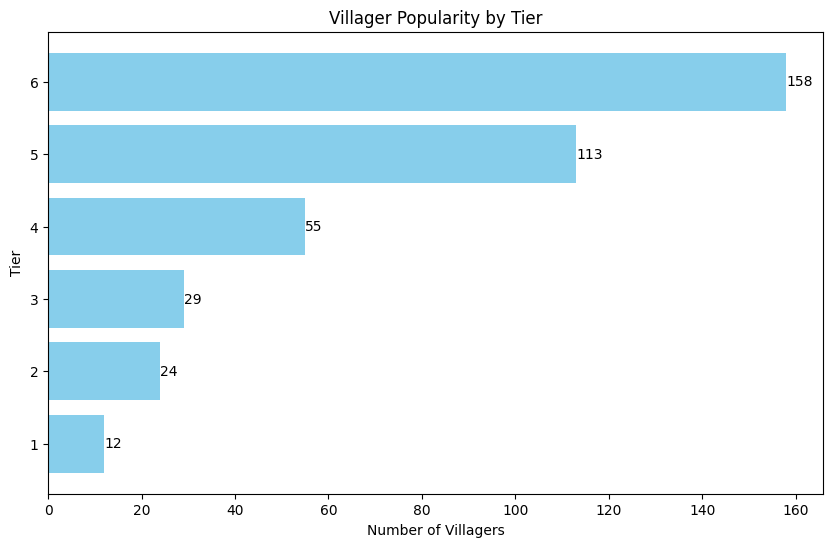

In [64]:
# The purpose of this plot is to visualize the distribution of villagers across different popularity tiers.
# By doing this, we can get a sense of which tiers have the most villagers and which have the least.
# This can help us understand the general popularity of the villagers.

# Count the number of villagers in each tier
tier_counts = final_merged_df['Tier'].value_counts()

# Create a horizontal bar graph
plt.figure(figsize=(10,6))
bars = plt.barh(tier_counts.index, tier_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Number of Villagers')
plt.ylabel('Tier')
plt.title('Villager Popularity by Tier')

# Display the counts on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()}', va='center')

# Display the plot
plt.show()

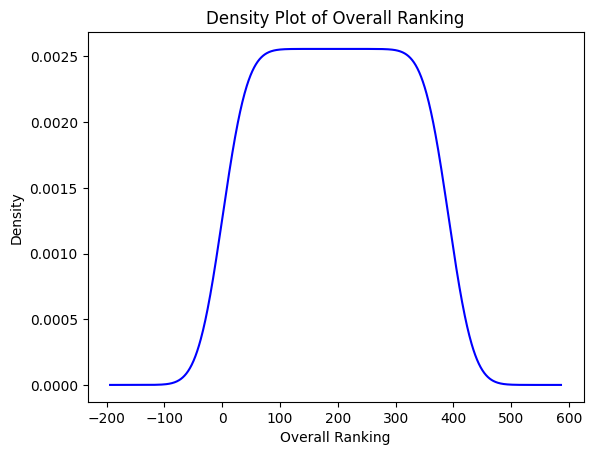

In [65]:
# Plotting a density plot for the 'Overall_Ranking' column.
# This plot will help us understand the distribution of the overall rankings of the villagers.
# The x-axis represents the overall ranking, and the y-axis represents the density (estimated probability) at each ranking.
# Peaks in the plot represent values (rankings) that occur more frequently (are more dense).
# This can help us identify if there are certain rankings that are more common among the villagers.
final_merged_df['Overall_Ranking'].plot(kind='density', color='blue')
plt.title('Density Plot of Overall Ranking')
plt.xlabel('Overall Ranking')
plt.show()

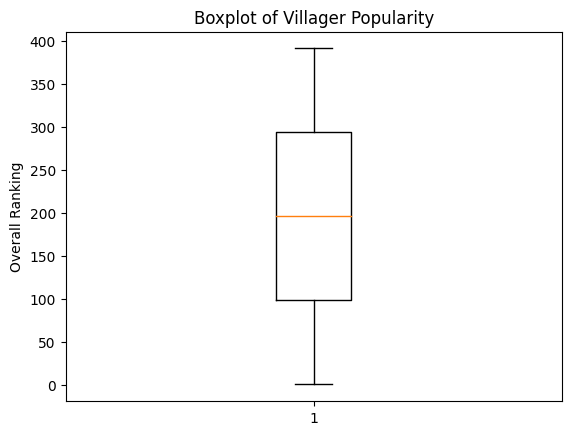

In [66]:
# Plotting a boxplot for the 'Overall_Ranking' column.
# This plot provides a summary of the statistical distribution of the overall rankings of the villagers.
# The box represents the interquartile range (IQR), which contains the middle 50% of the data (from the 25th percentile to the 75th percentile).
# The line inside the box represents the median (50th percentile) of the data.
# The whiskers extend from the box to the minimum and maximum values within 1.5 times the IQR.
# Any points outside of this range are considered outliers and are represented as individual points.
# This plot can help us understand the spread and skewness of the overall rankings, as well as identify any potential outliers.
plt.boxplot(final_merged_df['Overall_Ranking'])
plt.ylabel('Overall Ranking')
plt.title('Boxplot of Villager Popularity')
plt.show()

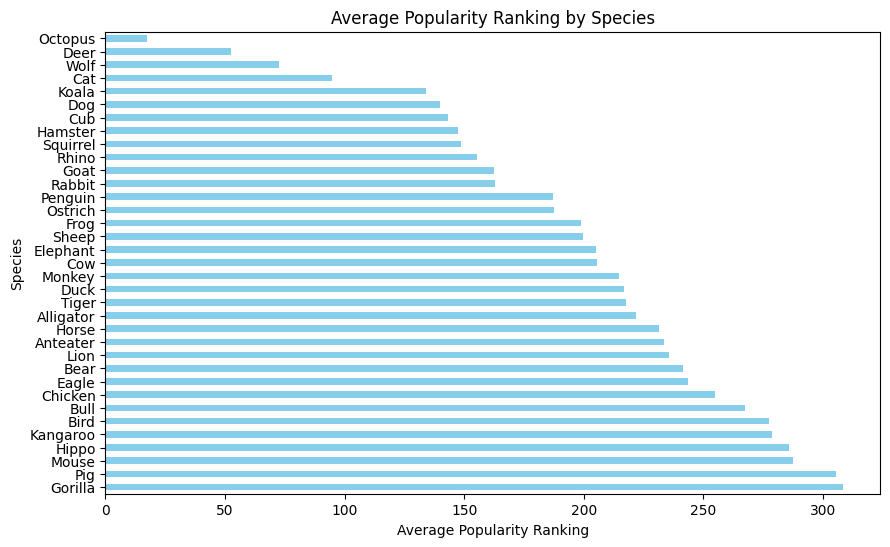

In [67]:
# The purpose of this code is to analyze the relationship between species and popularity.
# We want to see if certain species tend to be more popular than others.
# To do this, we calculate the average popularity ranking for each species, and then visualize this data using a bar plot.
# The y-axis of the plot represents the species, and the x-axis represents the average popularity ranking.
# The species are sorted in descending order of popularity, so the species at the top of the plot are the most popular.
# Calculate the average popularity ranking for each species
species_popularity = final_merged_df.groupby('Species')['Overall_Ranking'].mean().sort_values()

# Plot the average popularity ranking for each species
plt.figure(figsize=(10,6))
species_popularity.plot(kind='barh', color='skyblue')
plt.xlabel('Average Popularity Ranking')
plt.ylabel('Species')
plt.title('Average Popularity Ranking by Species')
plt.gca().invert_yaxis()  # Reverse the order of the y-axis
plt.show()

<Axes: ylabel='Tier,Gender'>

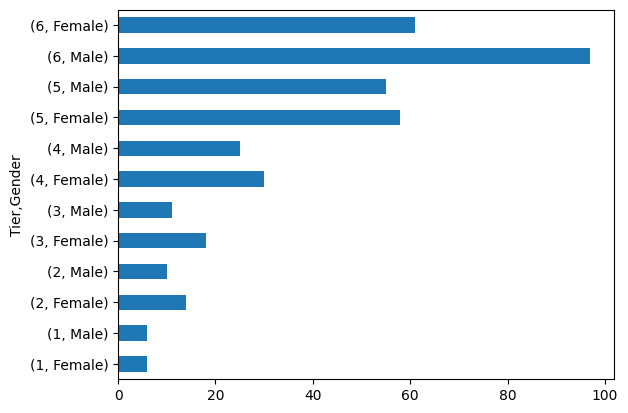

In [68]:
final_merged_df.groupby('Tier').Gender.value_counts().plot.barh()

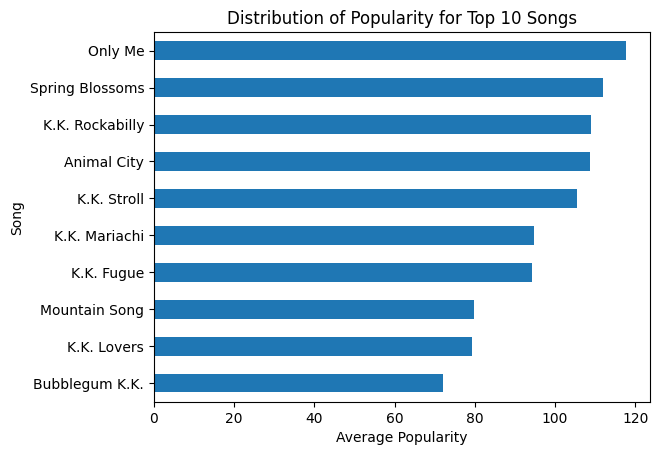

In [71]:
# Select top 10 songs

top_10_songs = song_popularity.sort_values().head(10)

# Plot distribution
top_10_songs.plot(kind='barh')
plt.xlabel('Average Popularity')
plt.title('Distribution of Popularity for Top 10 Songs'.format(10))
plt.show()

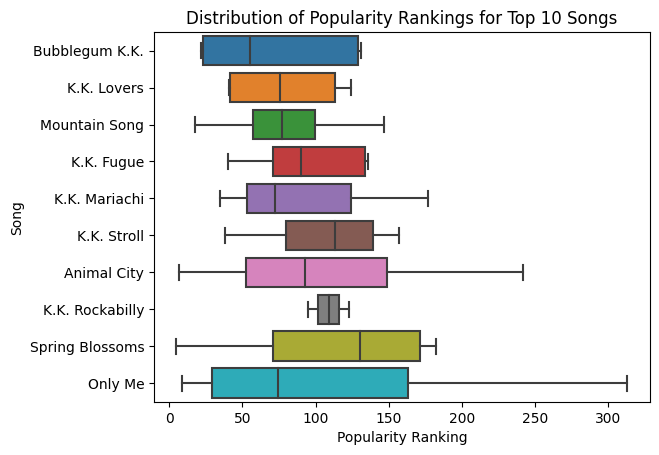

In [72]:
# Select songs in top 10 popularity
top_songs_df = final_merged_df[final_merged_df['Song'].isin(top_10_songs.index)]

# Create boxplot
sns.boxplot(x='Overall_Ranking', y='Song', data=top_songs_df, order=top_10_songs.index)
plt.xlabel('Popularity Ranking')
plt.title('Distribution of Popularity Rankings for Top 10 Songs'.format(10))
plt.show()